In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="DKuXYFgIKgI8IpqAew0o")
project = rf.workspace("roboflowhandonact").project("hand-7esdm-1rqyy")
version = project.version(1)
dataset = version.download("yolov8-obb")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 125.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Hand-1 in yolov8-obb:: 100%|██████████| 106/106 [00:00<00:00, 7574.17it/s]


In [2]:
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.7 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [6]:
!yolo task=obb mode=train model=yolo11n-obb.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True

Ultralytics 8.3.231 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Hand-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-obb.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=

In [7]:
# Mag-test sa isang random image mula sa test set
import glob
from IPython.display import Image, display


import random
test_images = glob.glob(f"{dataset.location}/test/images/*")
random_image = random.choice(test_images)

print(f"Testing on: {random_image}")

# I-run ang prediction
!yolo task=obb mode=predict model=runs/obb/train/weights/best.pt source="{random_image}"


Testing on: /content/Hand-1/test/images/IMG_3829_JPG_jpg.rf.c4c06648fd132a20f6688018f6588f25.jpg
Ultralytics 8.3.231 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-obb summary (fused): 109 layers, 2,653,918 parameters, 0 gradients, 6.6 GFLOPs

image 1/1 /content/Hand-1/test/images/IMG_3829_JPG_jpg.rf.c4c06648fd132a20f6688018f6588f25.jpg: 640x640 2 Hands, 11.2ms
Speed: 4.4ms preprocess, 11.2ms inference, 84.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/obb/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

Testing on: /content/Hand-1/test/images/IMG_3829_JPG_jpg.rf.c4c06648fd132a20f6688018f6588f25.jpg

image 1/1 /content/Hand-1/test/images/IMG_3829_JPG_jpg.rf.c4c06648fd132a20f6688018f6588f25.jpg: 640x640 2 Hands, 10.8ms
Speed: 4.4ms preprocess, 10.8ms inference, 80.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/obb/predict2


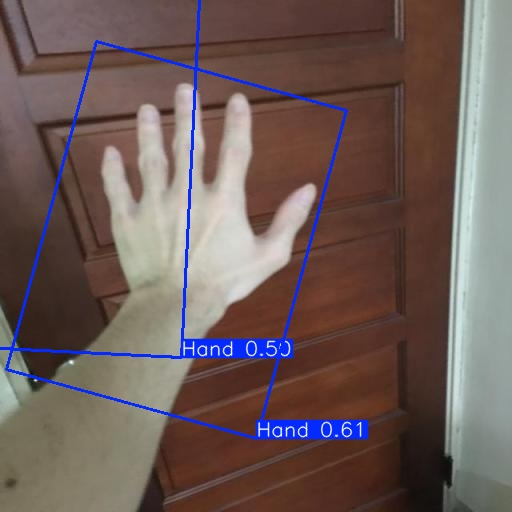

In [8]:
import os
from ultralytics import YOLO
from IPython.display import Image, display
import glob
import random

# 1. I-define ang HOME directory (para gumana yung f'{HOME}')
HOME = os.getcwd()


custom_model = YOLO(f'{HOME}/runs/obb/train/weights/best.pt')

# 3. Pumili ng random image mula sa test dataset mo para i-predict

test_images_path = glob.glob(f"{dataset.location}/test/images/*")
random_image_path = random.choice(test_images_path)

print(f"Testing on: {random_image_path}")

# 4. I-run ang predict command
# save=True -> para ma-save yung image na may box
# conf=0.25 -> kailangan 25% sure si AI bago niya i-box
results = custom_model.predict(source=random_image_path, conf=0.25, save=True)


latest_predict_folder = sorted(glob.glob(f'{HOME}/runs/obb/predict*'))[-1]
image_name = os.path.basename(random_image_path)
result_image_path = f"{latest_predict_folder}/{image_name}"

display(Image(filename=result_image_path, width=600))

In [11]:

result = results[0]

# 1. OBB Coordinates (x_center, y_center, width, height, rotation)

print("Coordinates (xywhr):")
print(result.obb.xywhr)

print("\n-------------------\n")

# 2. Confidence Score (Gaano ka-sure si AI? 1.0 means 100%)
print("Confidence Scores:")
print(result.obb.conf)

print("\n-------------------\n")

# 3. Class IDs (0 = Rock, 1 = Paper, etc. depende sa dataset mo)
print("Class IDs:")
print(result.obb.cls)

Coordinates (xywhr):
tensor([[1.7658e+02, 2.3988e+02, 2.6006e+02, 3.3995e+02, 2.6803e-01],
        [9.0691e+01, 1.5403e+02, 2.0259e+02, 3.9759e+02, 4.9759e-02]], device='cuda:0')

-------------------

Confidence Scores:
tensor([0.6126, 0.4968], device='cuda:0')

-------------------

Class IDs:
tensor([0., 0.], device='cuda:0')


In [ ]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow==1.1.48 --quiet

import roboflow

roboflow.login()

rf = roboflow.Roboflow()

project = rf.workspace("model-examples").project("football-players-obj-detection")
dataset = project.version(2).download("yolov8")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.3 MB/s eta 0:00:00
visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-obj-detection-2 in yolov8:: 100%|██████████| 756/756 [00:00<00:00, 6135.20it/s]


## Custom Training

/content
Ultralytics 8.3.231 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Hand-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-obb.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tr

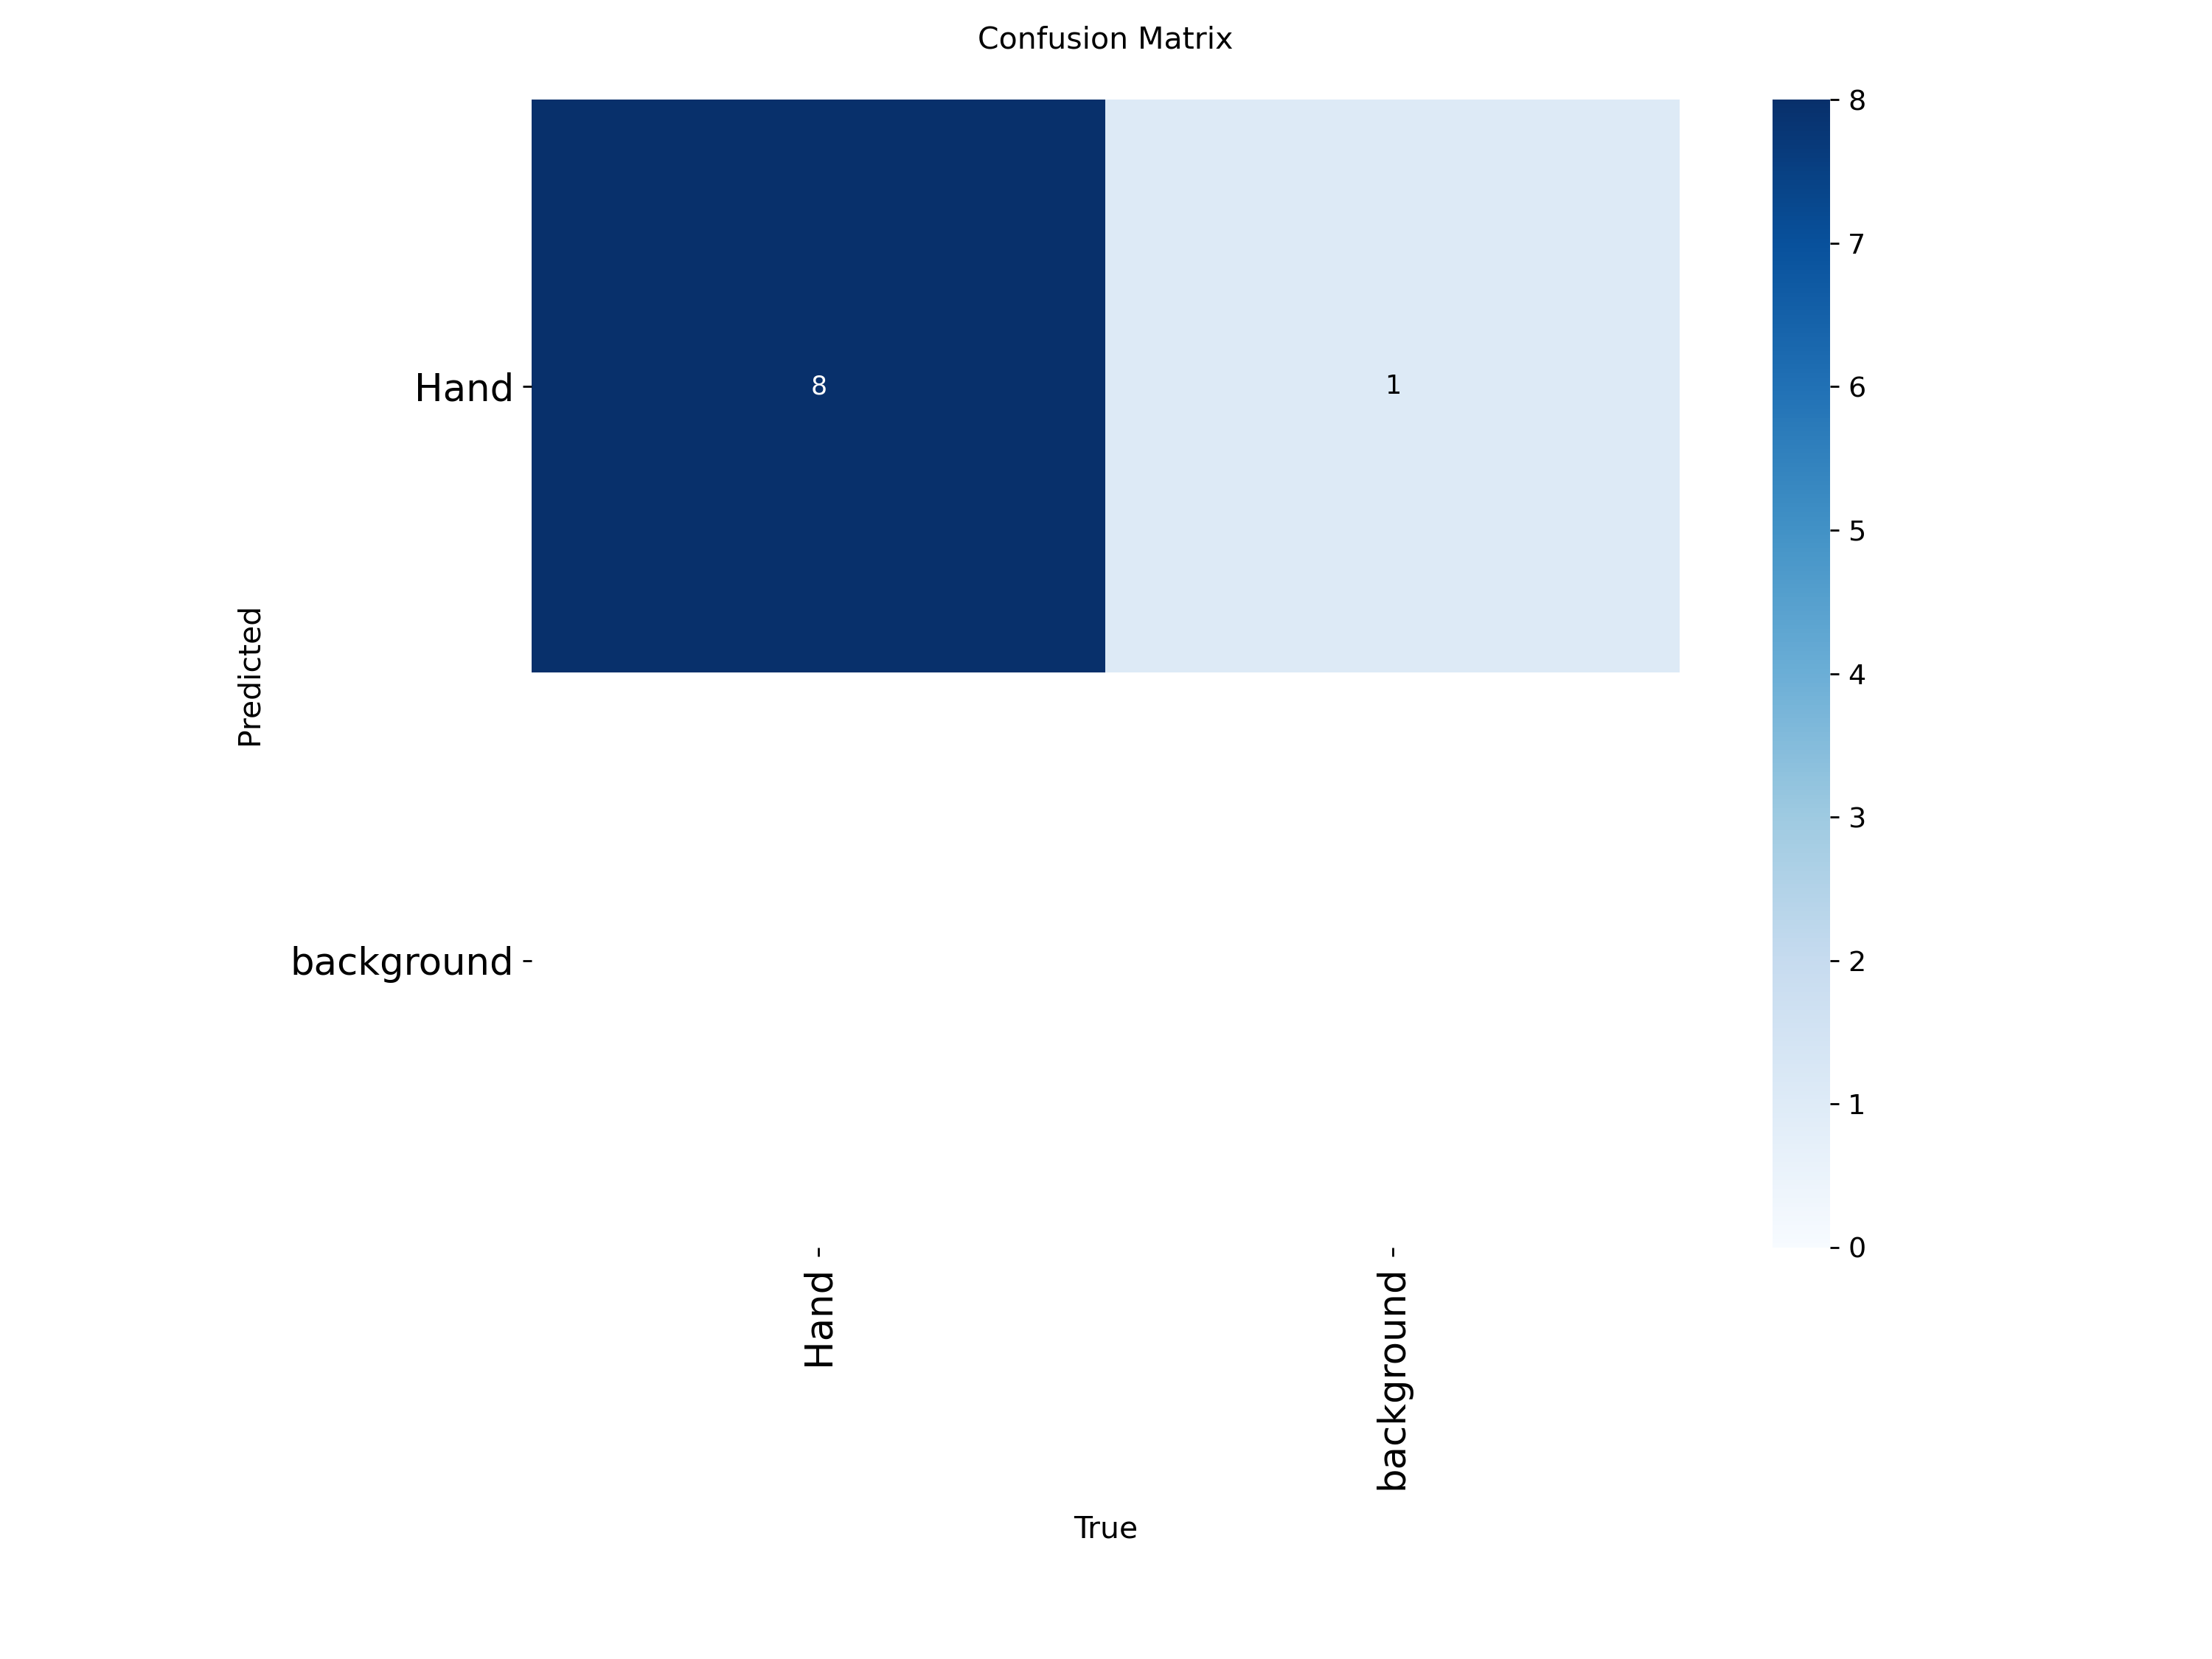

In [12]:
%cd {HOME}


#  model=yolo11n-obb.pt (Gamitin natin ang OBB version ng YOLO11)
# imgsz=640 (Standard size, pwede mo ibalik sa 800 kung kaya ng GPU mo)

!yolo task=obb mode=train model=yolo11n-obb.pt data={dataset.location}/data.yaml epochs=5 imgsz=640 plots=True

%cd {HOME}


from IPython.display import Image, display
display(Image(filename=f'{HOME}/runs/obb/train/confusion_matrix.png', width=800))

/content


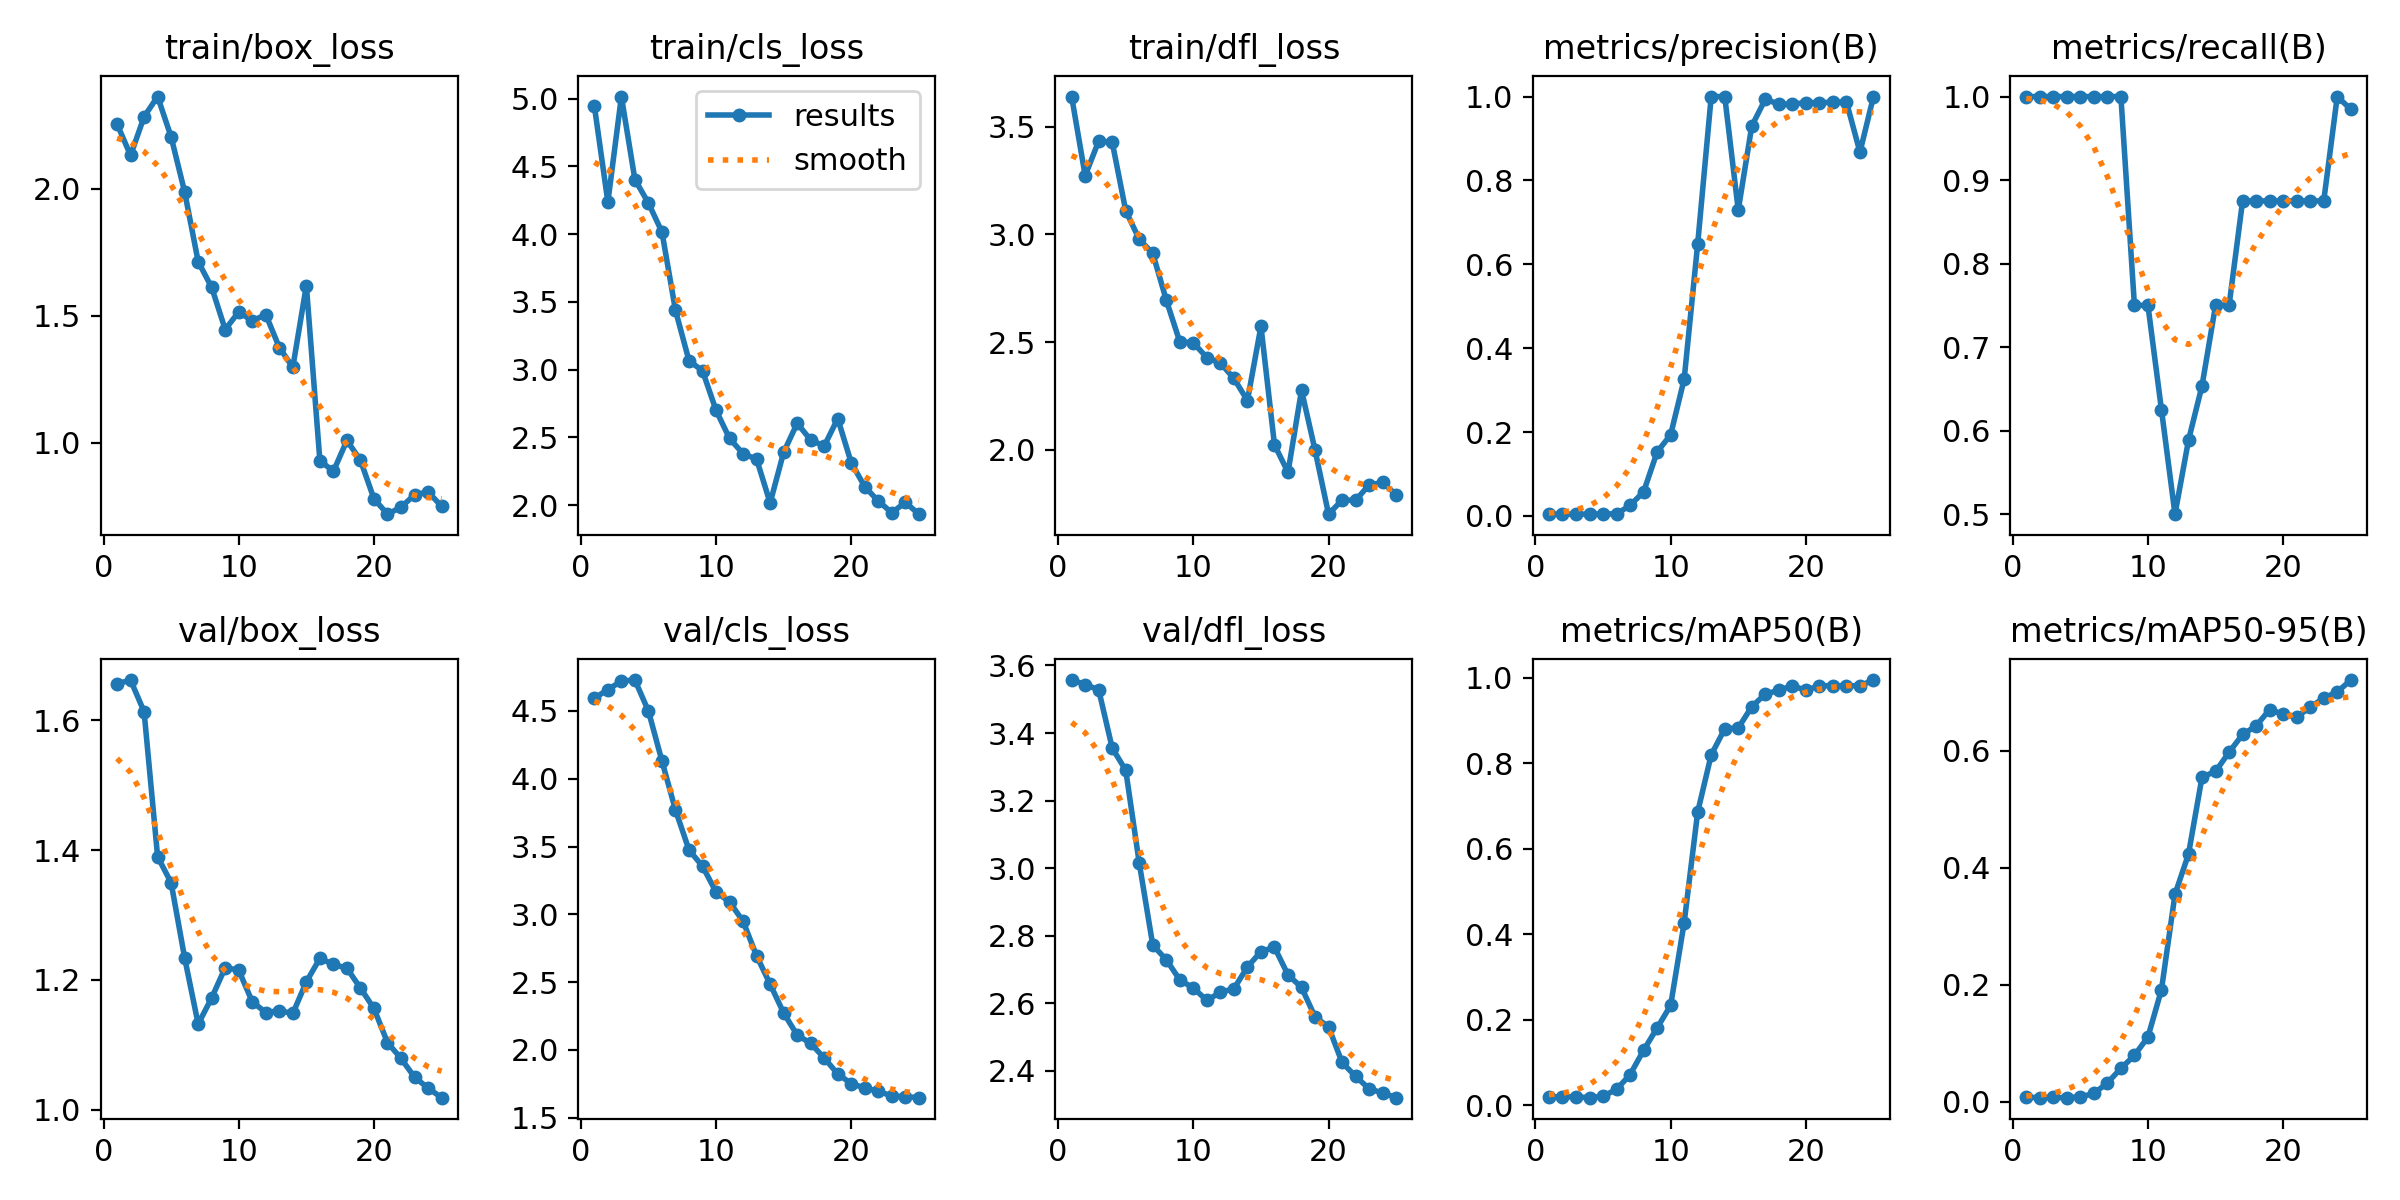

In [13]:
%cd {HOME}
from IPython.display import Image, display


display(Image(filename=f'{HOME}/runs/obb/train/results.png', width=800))

/content


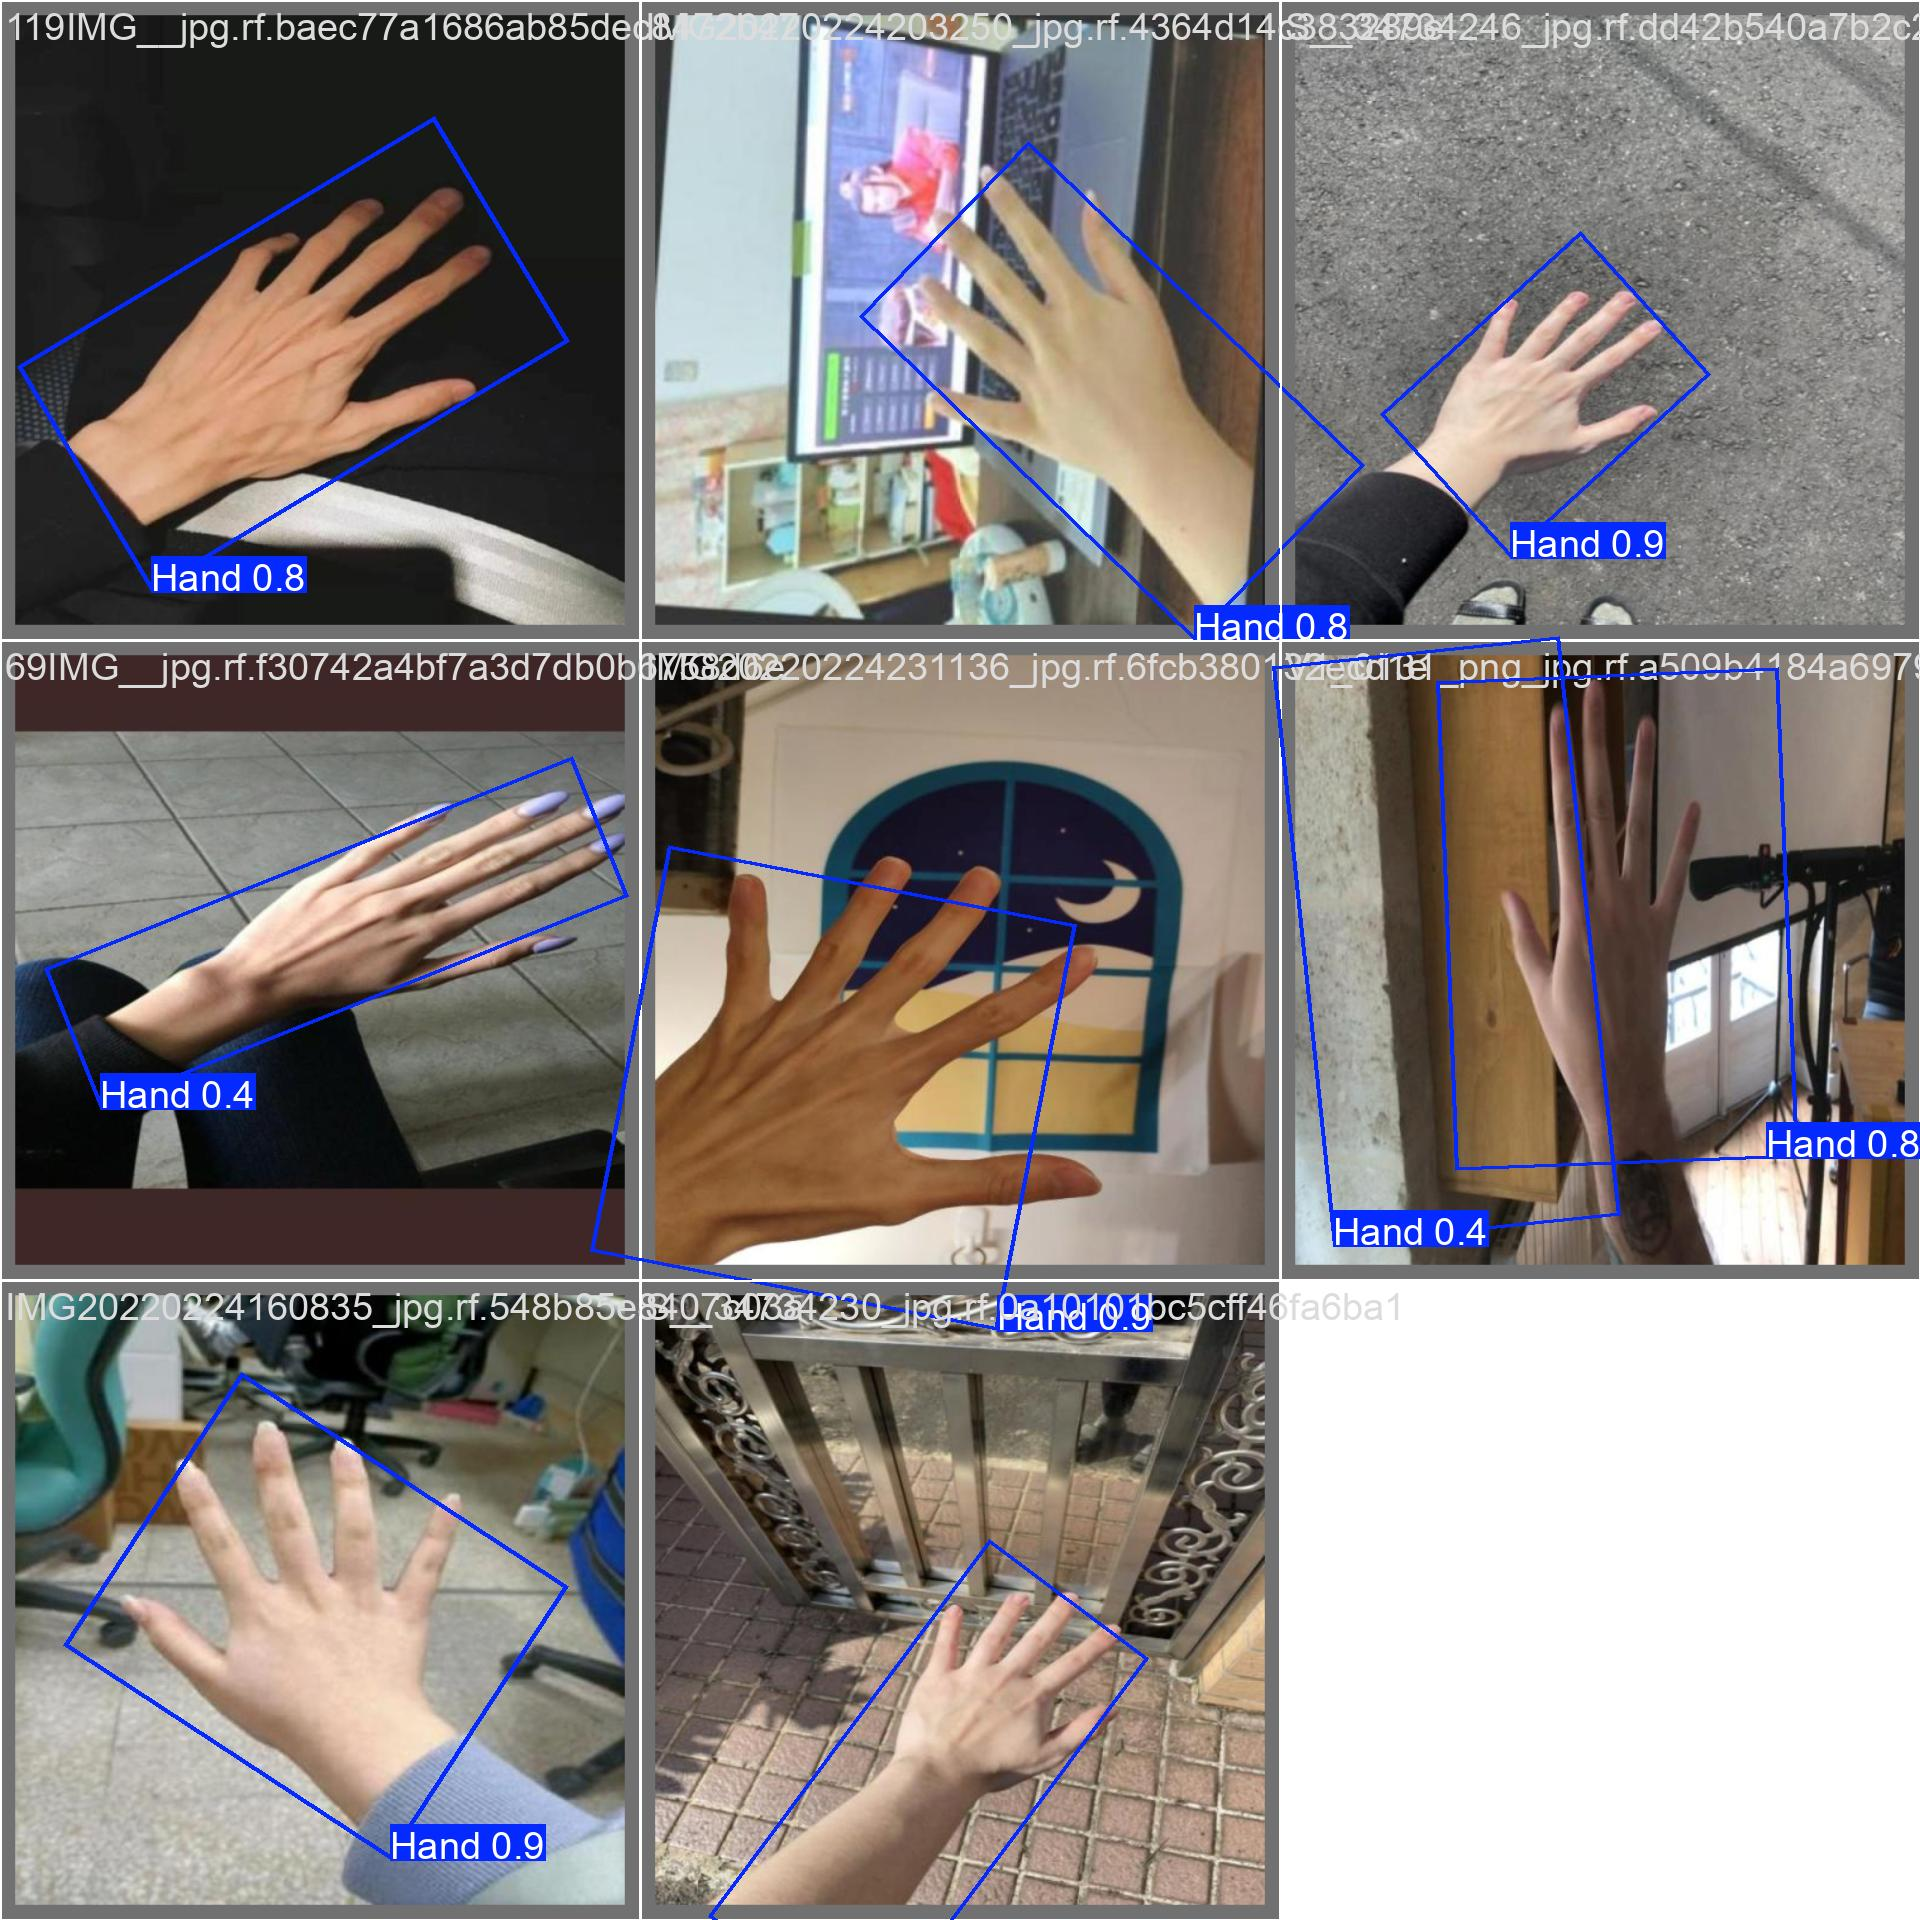

In [14]:
%cd {HOME}
from IPython.display import Image, display


display(Image(filename=f'{HOME}/runs/obb/train/val_batch0_pred.jpg', width=800))

## Validate Custom Model

In [15]:
%cd {HOME}


!yolo task=obb mode=val model={HOME}/runs/obb/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics 8.3.231 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-obb summary (fused): 109 layers, 2,653,918 parameters, 0 gradients, 6.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1213.0±256.0 MB/s, size: 30.5 KB)
val: Scanning /content/Hand-1/valid/labels.cache... 9 images, 0 backgrounds, 1 corrupt: 100% ━━━━━━━━━━━━ 9/9 172.4Kit/s 0.0s
val: /content/Hand-1/valid/images/IMG_3864_JPG_jpg.rf.90d5a65820d0a12ddc22304a18bdc8a0.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0181]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 3.3it/s 0.3s
                   all          8          8          1      0.984      0.995      0.721
Speed: 1.1ms preprocess, 12.8ms inference, 0.0ms loss, 12.8ms postprocess per image
Results saved to /content/runs/obb/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [16]:
%cd {HOME}


!yolo task=obb mode=predict model={HOME}/runs/obb/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics 8.3.231 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-obb summary (fused): 109 layers, 2,653,918 parameters, 0 gradients, 6.6 GFLOPs

image 1/5 /content/Hand-1/test/images/IMG20220224173709_jpg.rf.88433dad69f2c4b622156eafa19f2f70.jpg: 640x640 1 Hand, 10.9ms
image 2/5 /content/Hand-1/test/images/IMG20220224231847_jpg.rf.30773fc69d81dc92134aba641b122b86.jpg: 640x640 1 Hand, 8.9ms
image 3/5 /content/Hand-1/test/images/IMG20220226200116_jpg.rf.d944aa41d99ba20070a0c5581b2fb511.jpg: 640x640 1 Hand, 8.5ms
image 4/5 /content/Hand-1/test/images/IMG_20220225_103901_jpg.rf.54a4184b0cdf5d89a61fcde337325fbe.jpg: 640x640 2 Hands, 8.5ms
image 5/5 /content/Hand-1/test/images/IMG_3829_JPG_jpg.rf.c4c06648fd132a20f6688018f6588f25.jpg: 640x640 2 Hands, 8.5ms
Speed: 3.3ms preprocess, 9.1ms inference, 18.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/obb/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict
